In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
age = ctrl.Antecedent(np.arange(df.age.min(), df.age.max()+1, 1), 'age')
cholesterol = ctrl.Antecedent(np.arange(df.chol.min(), df.chol.max()+1, 1), 'cholesterol')
heart_rate = ctrl.Antecedent(np.arange(df.thalach.min(), df.thalach.max()+1, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(df.trestbps.min(), df.trestbps.max()+1, 1), 'blood_pressure')
target = ctrl.Consequent(np.arange(df.target.min(), df.target.max()+0.1, 0.1), 'target')

In [7]:
age.automf(number= 4, names= ['young', 'middle', 'old', 'very old']) #f1 
cholesterol.automf(number= 4, names= ['low', 'medium', 'high', 'very high']) #f2
heart_rate.automf(number= 4, names= ['low', 'medium', 'high', 'very high']) #f3
blood_pressure.automf(number= 4, names= ['low', 'medium', 'high', 'very high']) #f4

In [8]:
#print(target)
target['normal'] = 1-fuzz.smf(target.universe, 0, 0.50) 
target['terindikasi'] = fuzz.smf(target.universe, 0.51, 1.0)
print(type(target['normal']))
y = 1-fuzz.smf(target.universe, 0.51, 1.0)
print(target['normal'])

<class 'skfuzzy.control.term.Term'>
target[normal]


In [9]:
def createrules(lingvar):
    rules =[]
    for l in lingvar:
        rules.append(ctrl.Rule(
            age[l[0]]|
            cholesterol[l[1]]| 
            blood_pressure[l[2]]|
            heart_rate[l[3]], 
            target[l[4]]
        ))
    return rules


lingvar1 = [
    ['young', 'low', 'low', 'low','normal'],
    ['middle', 'medium', 'medium', 'medium','terindikasi'],
    ['old', 'high', 'high', 'high','terindikasi'],
    ['very old', 'very high', 'very high', 'very high','terindikasi'],   
]

rules = createrules(lingvar1)

Output fuzzy = 0.8535909186619649


C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


terindikasi


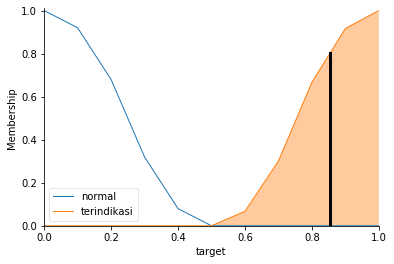

In [10]:
#control_system1 = ctrl.ControlSystem([rule33, rule34, rule35, rule36])
control_system1 = ctrl.ControlSystem(rules)
fuzzy_system1 =  ctrl.ControlSystemSimulation(control_system1)
fuzzy_system1.input['age'] = 64
fuzzy_system1.input['cholesterol'] = 335
fuzzy_system1.input['blood_pressure'] = 140
fuzzy_system1.input['heart_rate'] = 158
fuzzy_system1.compute()
output = print("Output fuzzy =",fuzzy_system1.output['target'])
target.view(sim = fuzzy_system1)
if fuzzy_system1.output['target'] < 0.50:
    print('normal')
else:
    print('terindikasi')